In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('rainfall prediction.csv')

In [ ]:
df

In [ ]:
df.sample()

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.shape  

In [ ]:
df.isnull().sum()

In [ ]:
df['Date'].nunique()

In [ ]:
df['Location'].nunique()

In [ ]:
df['Date']

In [ ]:
df['date']=df.Date.str[0]
df['Month']=df.Date.str[1]
df['Year']=df.Date.str[2]

In [ ]:
df.date=df.date.astype('int64')   #changing object data into int
df.Month=df.Month.astype('int64')
df.Year=df.Year.astype('int64')

In [ ]:
df=df.drop(['Date'],axis=1)

In [ ]:
df

In [ ]:
#fill null values with mean for numerical data

df['MinTemp']=df['MinTemp'].fillna(np.mean(df['MinTemp']))
df['MaxTemp']=df['MaxTemp'].fillna(np.mean(df['MaxTemp']))
df['Rainfall']=df['Rainfall'].fillna(np.mean(df['Rainfall']))
df['Evaporation']=df['Evaporation'].fillna(np.mean(df['Evaporation']))
df['Sunshine']=df['Sunshine'].fillna(np.mean(df['Sunshine']))
df['WindGustSpeed']=df['WindGustSpeed'].fillna(np.mean(df['WindGustSpeed']))
df['WindSpeed9am']=df['WindSpeed9am'].fillna(np.mean(df['WindSpeed9am']))
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(np.mean(df['WindSpeed3pm']))
df['Humidity9am']=df['Humidity9am'].fillna(np.mean(df['Humidity9am']))
df['Humidity3pm']=df['Humidity3pm'].fillna(np.mean(df['Humidity3pm']))
df['Pressure9am']=df['Pressure9am'].fillna(np.mean(df['Pressure9am']))
df['Pressure3pm']=df['Pressure3pm'].fillna(np.mean(df['Pressure3pm']))
df['Cloud9am']=df['Cloud9am'].fillna(np.mean(df['Cloud9am']))
df['Cloud3pm']=df['Cloud3pm'].fillna(np.mean(df['Cloud3pm']))
df['Temp9am']=df['Temp9am'].fillna(np.mean(df['Temp9am']))
df['Temp3pm']=df['Temp3pm'].fillna(np.mean(df['Temp3pm']))


In [ ]:
#fill null values with mode for categorical data

from scipy import stats as st

print(st.mode(df['WindGustDir']))
print(st.mode(df['WindDir9am']))
print(st.mode(df['WindDir3pm']))
print(st.mode(df['RainToday']))
print(st.mode(df['RainTomorrow']))

In [ ]:
df['WindGustDir']=df['WindGustDir'].fillna('N')
df['WindDir9am']=df['WindDir9am'].fillna('N')
df['WindDir3pm']=df['WindDir3pm'].fillna('SE')
df['RainToday']=df['RainToday'].fillna('No')
df['RainTomorrow']=df['RainTomorrow'].fillna('No')

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
        print(i)

In [ ]:
df.dtypes

In [ ]:
sns.heatmap(df.isnull())   #check null value heatmap

In [ ]:
#bivarient values for output as 1. RainTomorrow 2.Rainfall

sns.scatterplot(x='Location',y='RainTomorrow',data=df)

In [ ]:
sns.scatterplot(x='MinTemp',y='RainTomorrow',data=df)

In [ ]:
sns.scatterplot(x='MaxTemp',y='RainTomorrow',data=df)

In [ ]:
sns.scatterplot(x='Rainfall',y='RainTomorrow',data=df)

In [ ]:
sns.scatterplot(x='Location',y='Rainfall',data=df)

In [ ]:
sns.scatterplot(x='MinTemp',y='Rainfall',data=df)

In [ ]:
sns.scatterplot(x='MaxTemp',y='Rainfall',data=df)

In [ ]:
sns.scatterplot(x='RainTomorrow',y='Rainfall',data=df)

In [ ]:
sns.scatterplot(x='RainToday',y='Rainfall',data=df)

In [ ]:
sns.countplot(df['RainTomorrow'])

In [ ]:
sns.distplot(df['Location'])

In [ ]:
sns.distplot(df['MinTemp'])

In [ ]:
sns.distplot(df['MaxTemp'])

In [ ]:
sns.distplot(df['WindDir3pm'])

In [ ]:
sns.boxplot(df['WindDir3pm'])

In [ ]:
sns.boxplot(df['Humidity3pm'])

In [ ]:
df.corr()

In [ ]:
df=df.drop(['date', 'Month','Year'],axis=1)

In [ ]:
df

In [ ]:
df.corr()['RainTomorrow'].sort_values

In [ ]:
df.corr()['Rainfall']

In [ ]:
#to find skew
df.plot(kind='kde',subplots=True,layout=(5,5),figsize=(10,12))

In [ ]:
#to find outliers
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(10,12))

In [ ]:
df.skew()

In [ ]:
df.skew().sort_values()

In [ ]:
df=df.drop(['Temp9am','Pressure3pm'],axis=1)

In [ ]:
df.columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
X = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday','RainTomorrow']]
  
# VIF dataframe                                       # to find multi colinearity
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
  
# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]                
print(vif_df)

In [ ]:
df=df.drop(['MaxTemp','Temp3pm'],axis=1)

In [ ]:
#to remove outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
len(np.where(z>3)[0])

In [ ]:
df_new=df[(z<3).all(axis=1)]
print('new shape',df_new.shape)
print('old shape',df.shape)

In [ ]:
dataloss=(8425-8027)/8425*100
print('dataloss=',dataloss,'%')

In [ ]:
#splitting of feature and target data
x1=df.drop(['RainTomorrow'],axis=1)
y1=df['RainTomorrow']


In [ ]:
x1

In [ ]:
y1

In [ ]:
#to remove skewness
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method='yeo-johnson')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x1)
x1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

lg=LogisticRegression()
gnb=GaussianNB()
knn=KNeighborsClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()

x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=56,test_size=.25)
models=[lg,gnb,knn,svc,dtc]

for m in models:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm=m.predict(x_test)
    print ('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

In [ ]:
y1.value_counts()

In [ ]:
#perform smote

#we shall apply smote to balance the data

from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(x1,y1)

In [ ]:
trainx.shape

In [ ]:
trainy.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

model=[lg,gnb,svc,dtc,knn]
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=56,test_size=0.20)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm=m.predict(x_test)
    print ('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

In [ ]:
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

model=[lg,gnb,svc,dtc,knn]
for m in model:
    print('m=',m)
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm=m.predict(x_test)
    predm=m.predict(x_test)
    lss=accuracy_score(y_test,predm)
    
    for j in range(2,10):
        lsscore= cross_val_score(m,trainx,trainy,cv=j)
        lsc= lsscore.mean()
        print('at cv=',j)
        print('cross validation score is',lsc *100)
        print('accuracy_score is',lss*100)
        print('\n')

In [ ]:
#at cv=9 we are getting highest accuracy
#Grid Search Cv with Hyperparametr tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
grid_param={
    'criterion':['gini','entropy']
    
}
gd_sr=GridSearchCV(estimator=dtc,
                   param_grid=grid_param,
                   scoring='accuracy',
                   cv=9)
gd_sr.fit(trainx,trainy)
best_parameters=gd_sr.best_params_
print(best_parameters)

In [ ]:
gd_sr_predictions = gd_sr.predict(x_test)
 
# print classification report
print(classification_report(y_test,gd_sr_predictions))

In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dec=dtc.predict(x_test)

dts=accuracy_score(y_test,pred_dec)
print('acurac _score:',dts*100)

rfscore=cross_val_score(dtc,x1,y1,cv=9)
rfc=rfscore.mean()
print('cross val score',rfc*100)

In [ ]:
#AUC ROC CURVE

from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtc,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

In [ ]:
#Hence from this model we are able to plot the AUC curve with 89% accuracy.witn prediciing rain tommow

In [173]:
df_new

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,1,13.4,0.6,5.389395,7.632205,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,8.000000,4.503183,0,0
1,1,7.4,0.0,5.389395,7.632205,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,4.566622,4.503183,0,0
2,1,12.9,0.0,5.389395,7.632205,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,4.566622,2.000000,0,0
3,1,9.2,0.0,5.389395,7.632205,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,4.566622,4.503183,0,0
4,1,17.5,1.0,5.389395,7.632205,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,0.0,5.389395,7.632205,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,4.566622,4.503183,0,0
8421,9,3.6,0.0,5.389395,7.632205,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,4.566622,4.503183,0,0
8422,9,5.4,0.0,5.389395,7.632205,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,4.566622,4.503183,0,0
8423,9,7.8,0.0,5.389395,7.632205,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,3.000000,2.000000,0,0


In [174]:
x2=df_new.drop(['Rainfall'],axis=1)
y2=df_new['Rainfall']

In [175]:
x2

,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,1,13.4,5.389395,7.632205,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,8.000000,4.503183,0,0
1,1,7.4,5.389395,7.632205,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,4.566622,4.503183,0,0
2,1,12.9,5.389395,7.632205,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,4.566622,2.000000,0,0
3,1,9.2,5.389395,7.632205,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,4.566622,4.503183,0,0
4,1,17.5,5.389395,7.632205,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,5.389395,7.632205,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,4.566622,4.503183,0,0
8421,9,3.6,5.389395,7.632205,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,4.566622,4.503183,0,0
8422,9,5.4,5.389395,7.632205,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,4.566622,4.503183,0,0
8423,9,7.8,5.389395,7.632205,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,3.000000,2.000000,0,0


In [176]:
y2

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 8027, dtype: float64

In [177]:
from sklearn.preprocessing import power_transform
x2=power_transform(x2,method='yeo-johnson')

In [178]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2=sc.fit_transform(x2)
x2

array([[-1.56680947e+00,  5.73786583e-02,  1.85681650e-01, ...,
         8.35200854e-04, -5.41110685e-01, -5.43418972e-01],
       [-1.56680947e+00, -1.05664845e+00,  1.85681650e-01, ...,
         8.35200854e-04, -5.41110685e-01, -5.43418972e-01],
       [-1.56680947e+00, -3.49167687e-02,  1.85681650e-01, ...,
        -1.08127851e+00, -5.41110685e-01, -5.43418972e-01],
       ...,
       [ 1.01458405e+00, -1.43203211e+00,  1.85681650e-01, ...,
         8.35200854e-04, -5.41110685e-01, -5.43418972e-01],
       [ 1.01458405e+00, -9.81865581e-01,  1.85681650e-01, ...,
        -1.08127851e+00, -5.41110685e-01, -5.43418972e-01],
       [ 1.01458405e+00,  3.33784329e-01,  1.85681650e-01, ...,
         1.56102382e+00, -5.41110685e-01, -5.43418972e-01]])

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [182]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,random_state=i,test_size=0.25)
    lr.fit(x_train,y_train)
    lr.score(x_test,y_test)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'for random state{i}, the training accuracy is',{r2_score(y_train,pred_train)})
    print(f'for random state{i},the testing accuracy is',{r2_score(y_test,pred_test)})
    print('\n')

for random state0, the training accuracy is {0.49098723271964917}
for random state0,the testing accuracy is {0.47984221243789005}


for random state1, the training accuracy is {0.49337499283080244}
for random state1,the testing accuracy is {0.4732556492666632}


for random state2, the training accuracy is {0.49223135274820795}
for random state2,the testing accuracy is {0.47637996296114127}


for random state3, the training accuracy is {0.4888898818501014}
for random state3,the testing accuracy is {0.4862451452263087}


for random state4, the training accuracy is {0.48909632701997696}
for random state4,the testing accuracy is {0.48614241555983073}


for random state5, the training accuracy is {0.48738745425703434}
for random state5,the testing accuracy is {0.4897202986514352}


for random state6, the training accuracy is {0.49049393176369915}
for random state6,the testing accuracy is {0.4822671049687044}


for random state7, the training accuracy is {0.49069409516662077}
for random stat

for random state67, the training accuracy is {0.4884318849267306}
for random state67,the testing accuracy is {0.4863400908392841}


for random state68, the training accuracy is {0.4882459667623097}
for random state68,the testing accuracy is {0.48672952493926736}


for random state69, the training accuracy is {0.4903858950479678}
for random state69,the testing accuracy is {0.4818187889037342}


for random state70, the training accuracy is {0.4904268146799966}
for random state70,the testing accuracy is {0.4816898336876767}


for random state71, the training accuracy is {0.48720245670349294}
for random state71,the testing accuracy is {0.4915841692456613}


for random state72, the training accuracy is {0.4834653168479427}
for random state72,the testing accuracy is {0.5027284280483197}


for random state73, the training accuracy is {0.4903149272284366}
for random state73,the testing accuracy is {0.48270672562071615}


for random state74, the training accuracy is {0.4871790320093593}
for ran

Eigenvalues:
[3.59771479 2.80239236 1.8620209  1.31871379 1.00629132 0.94788524
 0.86177881 0.71193408 0.65451823 0.5684263  0.47438698 0.46221518
 0.43211309 0.39131898 0.35240021 0.30264798 0.25535988]

Variances (Percentage):
[21.16039168 16.48260727 10.9516996   7.75617357  5.91862328  5.57510089
  5.0686556   4.18732582  3.84962761  3.34326756  2.79016399  2.71857409
  2.54152506  2.30158958  2.07268414  1.78006043  1.50192983]



Text(0, 0.5, 'Explained variance (%)')

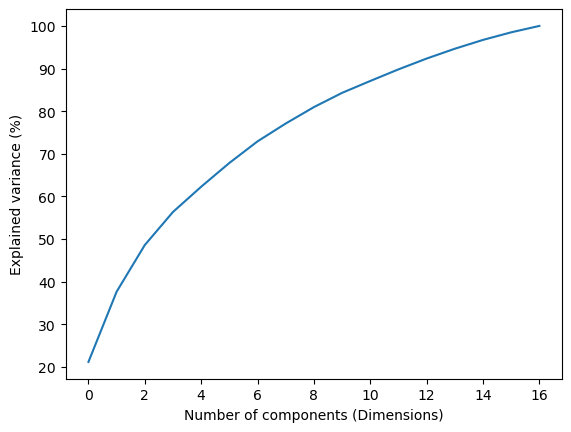

In [184]:
# we see that the r2 score for testing and training data set is almost same but we are getting low accuRACY.
#WE WILL CHECK WITH MULTICOLINEARITY AND APPLY PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(x2)

                                                                 # Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

                                                                  # Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

                                                                   # Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [185]:
#n_components=15 as it covers 90% of data

from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_pca = pca.fit_transform(x2)

                                   # Get the transformed dataset
X = pd.DataFrame(X_pca)
print(X.head())
print("\nSize: ")
print(X.shape)

         0         1         2         3         4         5         6   \
0  0.245183 -1.354336 -2.135531 -1.462247 -1.783249  0.237829 -0.312663   
1  1.080847  0.033773 -2.240687 -1.264007 -2.086038  0.681488  1.214686   
2  1.677122 -1.343612 -2.844204 -1.468729 -1.396987  0.948175 -0.276114   
3  1.387601  1.924518  0.216801 -0.082764 -1.798363  0.834729 -1.765181   
4 -0.476724 -0.381424  0.455264 -1.304667 -2.293449  0.137825  0.777971   

         7         8         9         10        11        12        13  \
0  0.850431 -0.204145  0.486526  0.733000 -0.433083 -0.867003 -0.738704   
1  0.290716 -0.022352  0.027209  0.828055 -0.145707 -0.125090  0.425268   
2  0.200942 -0.542482  0.005773  0.152770 -0.167100 -0.620770 -0.590127   
3  0.190904  0.755792 -0.984080  1.225201  0.278947 -0.178811 -0.394160   
4  1.045482 -0.386766  1.048583  0.839605  1.020116  0.715954  0.278701   

         14  
0 -0.780837  
1  0.123798  
2  0.114627  
3 -0.031911  
4 -0.441185  

Size: 
(8027,

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,random_state=i,test_size=0.25)
    lr.fit(x_train,y_train)
    lr.score(x_test,y_test)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'for random state{i}, the training accuracy is',{r2_score(y_train,pred_train)})
    print(f'for random state{i},the testing accuracy is',{r2_score(y_test,pred_test)})
    print('\n')

for random state0, the training accuracy is {0.49098723271964917}
for random state0,the testing accuracy is {0.47984221243789005}


for random state1, the training accuracy is {0.49337499283080244}
for random state1,the testing accuracy is {0.4732556492666632}


for random state2, the training accuracy is {0.49223135274820795}
for random state2,the testing accuracy is {0.47637996296114127}


for random state3, the training accuracy is {0.4888898818501014}
for random state3,the testing accuracy is {0.4862451452263087}


for random state4, the training accuracy is {0.48909632701997696}
for random state4,the testing accuracy is {0.48614241555983073}


for random state5, the training accuracy is {0.48738745425703434}
for random state5,the testing accuracy is {0.4897202986514352}


for random state6, the training accuracy is {0.49049393176369915}
for random state6,the testing accuracy is {0.4822671049687044}


for random state7, the training accuracy is {0.49069409516662077}
for random stat

for random state71, the training accuracy is {0.48720245670349294}
for random state71,the testing accuracy is {0.4915841692456613}


for random state72, the training accuracy is {0.4834653168479427}
for random state72,the testing accuracy is {0.5027284280483197}


for random state73, the training accuracy is {0.4903149272284366}
for random state73,the testing accuracy is {0.48270672562071615}


for random state74, the training accuracy is {0.4871790320093593}
for random state74,the testing accuracy is {0.49156254434345914}


for random state75, the training accuracy is {0.4930302717309689}
for random state75,the testing accuracy is {0.4743368566322709}


for random state76, the training accuracy is {0.48204800144850646}
for random state76,the testing accuracy is {0.5056930280945138}


for random state77, the training accuracy is {0.49317015640704376}
for random state77,the testing accuracy is {0.4741422026298062}


for random state78, the training accuracy is {0.48468596316798673}
for 

In [191]:
#checking with other models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x2,y2,random_state=42,test_size=.20)
for i in [dt,svr,knn]:
    i.fit(x_train,y_train)
    pred_train=i.predict(x_train)
    pred_test=i.predict(x_test)
    test_score=r2_score(y_test,pred_test)
    train_score=r2_score(y_train,pred_train)
    if abs(train_score-test_score)<=0.1:
        print(i)
        print('the training accuracy is',{r2_score(y_train,pred_train)})
        print('the testing accuracy is',{r2_score(y_test, pred_test)})
        print('Mean absolute error is',mean_absolute_error(y_test,pred_test))
        print('Mean squared error is',(mean_squared_error(y_test,pred_test,squared=False)))
        print('\n')

SVR()
the training accuracy is {0.46039915527614006}
the testing accuracy is {0.4762468295318566}
Mean absolute error is 1.0589562942124577
Mean squared error is 2.9156046219399103




In [192]:
#Since Linear regresssion models is providing much accuracy we can consider thus model.
lr.fit(x_train,y_train)
LinearRegression()
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.4926265202703761


In [193]:
Train_accuracy=r2_score(y_train,pred_train)
testing_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,y2,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is {cv_mean} and the train accuracy score is {Train_accuracy} and test accuracy score is {testing_accuracy}')
    print('\n')

at cross fold 2 the cv score is 0.4805824627948653 and the train accuracy score is 0.6710003209891995 and test accuracy score is 0.4926265202703761


at cross fold 3 the cv score is 0.4796640573166813 and the train accuracy score is 0.6710003209891995 and test accuracy score is 0.4926265202703761


at cross fold 4 the cv score is 0.47829431695972924 and the train accuracy score is 0.6710003209891995 and test accuracy score is 0.4926265202703761


at cross fold 5 the cv score is 0.4835929617057789 and the train accuracy score is 0.6710003209891995 and test accuracy score is 0.4926265202703761


at cross fold 6 the cv score is 0.48058383044591063 and the train accuracy score is 0.6710003209891995 and test accuracy score is 0.4926265202703761


at cross fold 7 the cv score is 0.48009331531555866 and the train accuracy score is 0.6710003209891995 and test accuracy score is 0.4926265202703761


at cross fold 8 the cv score is 0.48125861847866963 and the train accuracy score is 0.67100032098

In [194]:
#Grid Search Cv with Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters= {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [195]:
# Model Training

ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

48.680868119212285

In [196]:
#ensemble method
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
rfr=RandomForestRegressor()
ad=AdaBoostRegressor()
gb=GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(x2,y2,random_state=42,test_size=.20)
for i in [gb,ad,rfr]:
    i.fit(x_train,y_train)
    pred_train=i.predict(x_train)
    pred_test=i.predict(x_test)
    test_score=r2_score(y_test,pred_test)
    train_score=r2_score(y_train,pred_train)
    print(i)
    print('the training accuracy is',{r2_score(y_train,pred_train)})
    print('the testing accuracy is',{r2_score(y_test, pred_test)})
    print('Mean absolute error is',mean_absolute_error(y_test,pred_test))
    print('Mean squared error is',(mean_squared_error(y_test,pred_test,squared=False)))
    print('\n')

GradientBoostingRegressor()
the training accuracy is {0.6283284421301097}
the testing accuracy is {0.5633855971676238}
Mean absolute error is 1.188855113894976
Mean squared error is 2.662038465072027


AdaBoostRegressor()
the training accuracy is {0.420799652473419}
the testing accuracy is {0.31489734007055137}
Mean absolute error is 1.5421586242549385
Mean squared error is 3.334595228484237


RandomForestRegressor()
the training accuracy is {0.9492086701005576}
the testing accuracy is {0.6472092690698704}
Mean absolute error is 0.9533227232264019
Mean squared error is 2.392896313535406




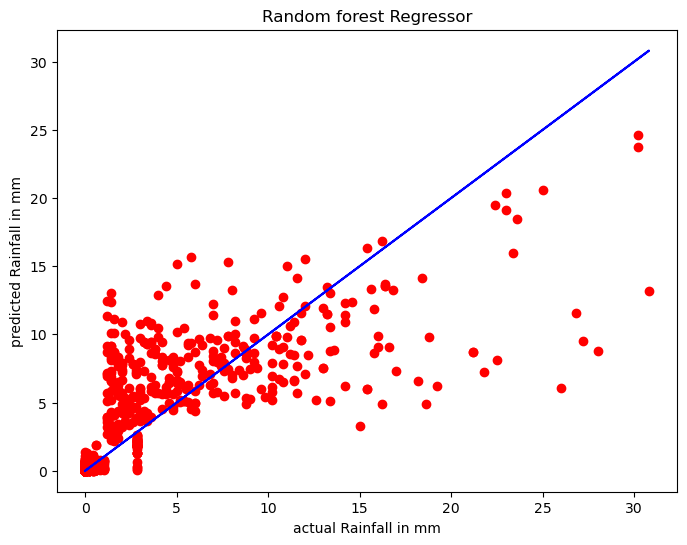

In [197]:
#Using Random forest we can get training accuracy of 94% and testing accuracy of 63%
plt.figure(figsize=[8,6])
x_train,x_test,y_train,y_test=train_test_split(x2,y2,random_state=42,test_size=.20)
plt.scatter(x=y_test,y=pred_test,color='red')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual Rainfall in mm')
plt.ylabel('predicted Rainfall in mm')
plt.title('Random forest Regressor')
plt.show()

In [198]:
#saving the model
import pickle
filename='Rainfall.pkl'
pickle.dump(rfr,open(filename,'wb'))

In [199]:
loadmodel=pickle.load(open('Rainfall.pkl','rb'))
result=loadmodel.score(x_test,y_test)
print(result*100)

64.72092690698705
